In [ ]:
# Basic libraries that need to be loaded
import pandas as pd
import numpy as np
from itertools import product
import warnings
from tqdm import tqdm
import os 

# Libraries used for Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries used for Preprocessing, Model Building and Evaluation of results
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,  accuracy_score, precision_recall_fscore_support
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Libraries for Language Processing
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# Instructions to ignore warnings and other miscellaneous tweeks
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


%matplotlib inline
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import describe,skew

Now we are done importing libraries

In [2]:
# Let us load the data into Python. 
data = pd.read_csv('train.csv')

In [3]:
# Let has have a look at the data 
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
# To find dimensions of data
data.shape

(233154, 41)

Dataset has 2,33,154 Rows and 41 Columns.

In [5]:
#To list all the Columns Headings in the data 
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [6]:
# To check for missing values and find out how many are there in each column
data.isnull().sum() 

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

There are 7,661 missing values in the dataset. All of them are from the same column -  'Employment.Type'. 

In [7]:
# To find the percentage of missing values for the column.  
print('Percentage of missing values is {0}%'.format(round(100*data['Employment.Type'].isnull().sum()/len(data),3)))

Percentage of missing values is 3.286%


In [8]:
# Let us find out how many unique entries are there in each field. 
data.apply(lambda x: len(x.unique()))

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             3
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

In [9]:
# We see that there are only 3 unique entries in Employee.Type. Let us see what they are.  
data['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

Invariably the third kind of unique entries are nothing but the missing values.

In [10]:
# creation of an additional factor for Employment.Type Column called 'unknown' to replace all the missing entries in the column. 
data.fillna('unknown', inplace=True)
data['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
unknown            7661
Name: Employment.Type, dtype: int64

This ensures that there is no data loss of any kind due to incomplete rows.

In [11]:
# to ensure there are no missing values after replacement...
data.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

No Missing Values. We can go ahead with further data treatment and visualisation. 

In [12]:
# Now let us see the class distribution of the output variable 
data.loan_default.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

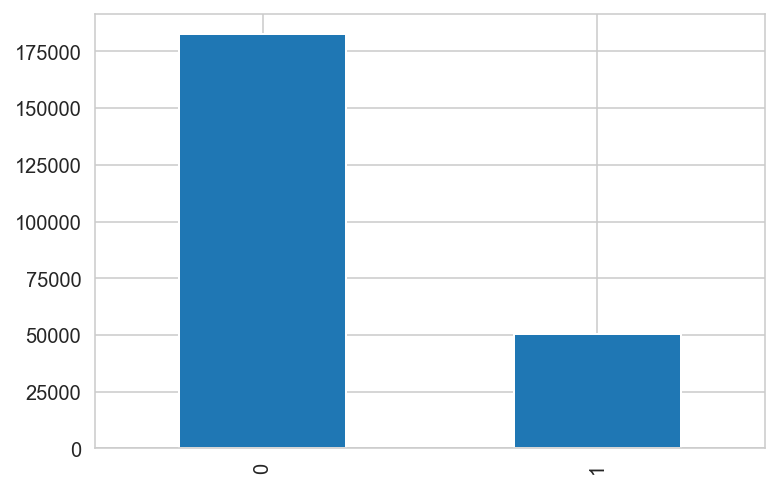

In [13]:
# Visualising the same, 
data.loan_default.value_counts().plot(kind = 'bar')

Clearly the data has an imbalance. 

In [14]:
# let us find out the fraction of people who default on their car loans as per data.
fraud_frac = data.loan_default.value_counts().min() / data.shape[0]
print("Fraction of loan default: {}".format("%.3f" % fraud_frac))

Fraction of loan default: 0.217


This means that 21.7% of the loans given are being defaulted upon. Does not seem like that the company has taken necessary precausions to prevent it.  

In [15]:
# To see how many unique manufacture_id are there, 
print(data['manufacturer_id'].unique())

[ 45  86  48  51 120  49 145  67 153 156 152]


In [16]:
# to look at the kind of data we are dealing with, 
data.dtypes.value_counts()

int64      34
object      6
float64     1
dtype: int64

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


In [18]:
print(data['PERFORM_CNS.SCORE'].unique())

[  0 598 305 825  17 718 818 300 786 738 688 585 615 750 801 730 758 768
 610 653 413 709 719  16  15 701 626 717 692 501 693 762 749 702  18 763
 599 824 575 607 819 841 656 836 427 687 743 783 733 708 772 650 342 680
 676 548 429 597 663 667 792 707 798 606 681 830 684 686 593 746 829 651
 710 573 695 671 729 879 603 753 502 739 605 706 657 639 785 405 690 602
 635 630 741 625 628 766  14 809 737 722 760 640 797 505 774 620 728 694
 679 470 823 685 832 662 627 392 643 727 660 705 726 796 611 771 586 839
 623 700 691 793 752 644 734 582 437 601 703 675 755 740 810 661 324 759
 646 659 583 440 638 490 609 721 574 673 600 784 652 595 777 596 655 678
 713 362 466 399 426 532 386 821 714 508 636 537 698 590 488 608 519 398
 308 634 666 523 642 616 455 672 451 469 567 572 723 367 369 654 641 647
 366 845 775 724 323 461 665 493 459 512 549 335 571 617 449 540 442 594
 757 423 568 613 562 633 309 406 517 534 649 471 344 503 499 513 699 417
 683 624 428 732 404 711 612 805 375 629 677 569 58

In [19]:
print(data['PERFORM_CNS.SCORE.DESCRIPTION'].unique())

['No Bureau History Available' 'I-Medium Risk' 'L-Very High Risk'
 'A-Very Low Risk' 'Not Scored: Not Enough Info available on the customer'
 'D-Very Low Risk' 'M-Very High Risk' 'B-Very Low Risk' 'C-Very Low Risk'
 'E-Low Risk' 'H-Medium Risk' 'F-Low Risk' 'K-High Risk'
 'Not Scored: No Activity seen on the customer (Inactive)'
 'Not Scored: Sufficient History Not Available'
 'Not Scored: No Updates available in last 36 months' 'G-Low Risk'
 'J-High Risk' 'Not Scored: Only a Guarantor'
 'Not Scored: More than 50 active Accounts found']


In [20]:
# Let us look at the column headings now 
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [21]:
data=data.drop(['UniqueID', 'branch_id','supplier_id', 'Current_pincode_ID','State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag'],axis=1)

In [22]:
#Conversion of categorical variables into numeric factors
def credit_risk(data): #here we are definig a function to create an additional factor called unknown to replace all '-' values in the credit risk column 
    d1=[]
    d2=[]
    for i in data:
        p = i.split("-")
        if len(p) == 1:
            d1.append(p[0])
            d2.append('unknown')
        else:
            d1.append(p[1])
            d2.append(p[0])

    return d2

sub_risk = {'unknown':-1, 'A':13, 'B':12, 'C':11,'D':10,'E':9,'F':8,'G':7,'H':6,'I':5,'J':4,'K':3, 'L':2,'M':1}
employment_map = {'Self employed':0, 'Salaried':1, 'unknown':2}

data.loc[:,'credit_risk_grade']  = credit_risk(data["PERFORM_CNS.SCORE.DESCRIPTION"])
data.loc[:,'Credit Risk'] = data['credit_risk_grade'].apply(lambda x: sub_risk[x])

data.loc[:,'Employment Type'] = data['Employment.Type'].apply(lambda x: employment_map[x])

data=data.drop(['PERFORM_CNS.SCORE.DESCRIPTION', 'credit_risk_grade','Employment.Type'],axis=1)

In [23]:
# Conversion of date variables into age
def age(dur):
    yr = int(dur.split('-')[2])
    if yr >=0 and yr<=19:
        return yr+2000
    else:
         return yr+1900

data['Date.of.Birth'] = data['Date.of.Birth'].apply(age)
data['DisbursalDate'] = data['DisbursalDate'].apply(age)
data['Age']=data['DisbursalDate']-data['Date.of.Birth']
data=data.drop(['DisbursalDate','Date.of.Birth'],axis=1)

In [24]:
numerical=['disbursed_amount','asset_cost','PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','NO.OF_INQUIRIES','Age','NEW.ACCTS.IN.LAST.SIX.MONTHS', 
        'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
categorical=['manufacturer_id', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'NO.OF_INQUIRIES', 'Credit Risk','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH',
       'Employment Type']

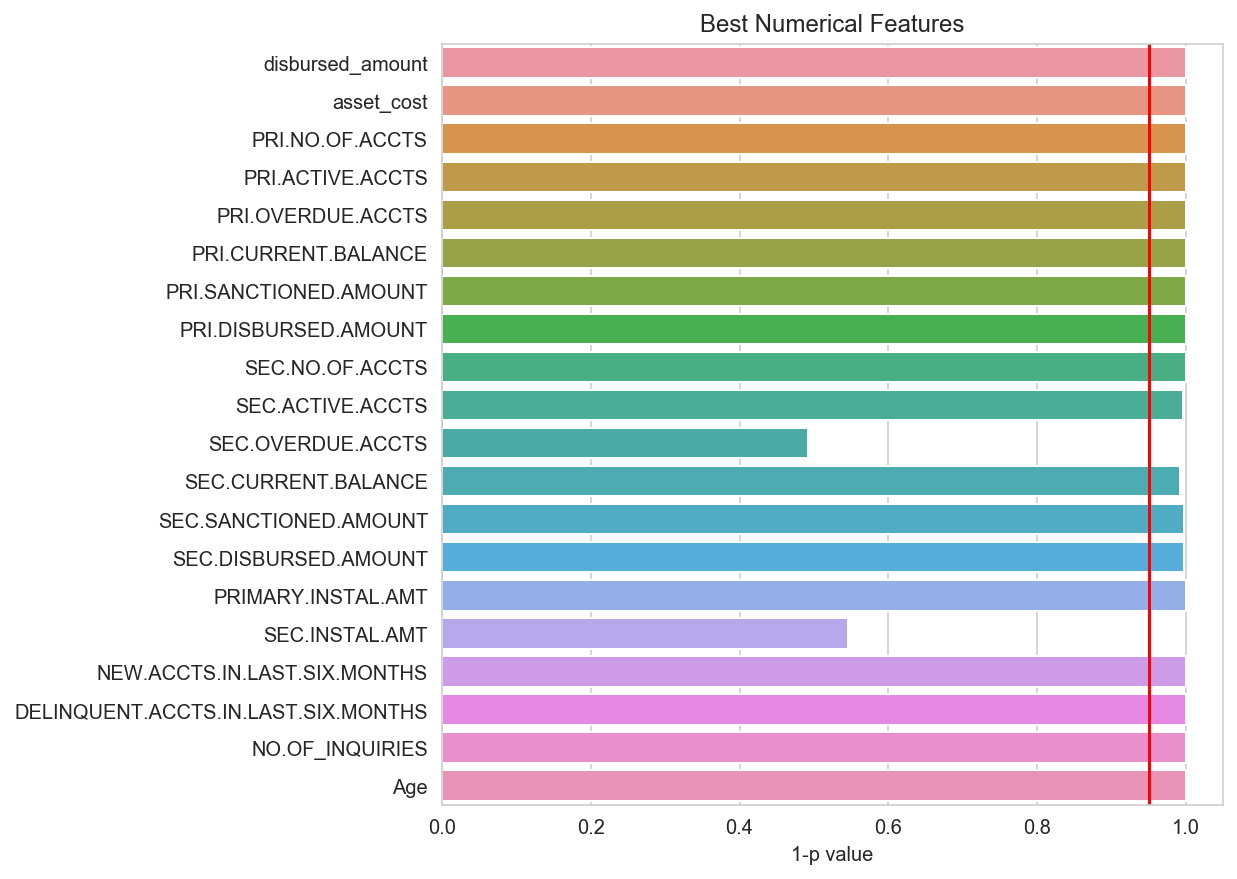

In [25]:
#T Test for numerical columns
p=[]
from scipy.stats import ttest_ind

for i in numerical:
    data1=data.groupby('loan_default').get_group(0)
    data2=data.groupby('loan_default').get_group(1)
    t,pvalue=ttest_ind(data1[i],data2[i])
    p.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=p, y=numerical)
plt.title('Best Numerical Features')
plt.axvline(x=(1-0.05),color='r')
plt.xlabel('1-p value')
plt.show()

The Graph shows 'Acceptance of Alternate Hypothesis'. The features that cross the red line show statistical signifance as per T-test. The two features that do not cross the line are both secondary account features, which banks by convention do not ignore(being a guarantor for someone else's loan). So let us keep them and go ahead. T tests are conducted assuming the standard deviations of any two samples taken from the population will be the same. Let us check that for the given Dataset to ensure the credibility of T test. 

In [26]:
for i in numerical:
    data1=data.groupby('loan_default').get_group(0)
    data2=data.groupby('loan_default').get_group(1)
    print(np.std(data1[i],ddof=1),np.std(data2[i],ddof=1))

13140.699007454747 12150.255527172361
19015.002867400784 18680.50260861944
5.261141650230395 5.040133626442075
2.00824201211921 1.669965727209364
0.5320262425891056 0.6034839757822149
994631.7352945375 720451.2837836256
1234346.7457193038 4525738.059420641
1240214.8264108973 4527095.229860132
0.6516570890284885 0.5273583476262503
0.3233747412831527 0.28809588122653623
0.11124913670225146 0.11046343401346292
184110.75765852304 106044.42506894954
195212.28973438882 130717.868085271
194597.53945618658 130392.7661245395
157963.98513594718 124665.51133348931
16588.052553484686 11045.628444415664
0.9729689997391793 0.885661148793889
0.3702351321845456 0.43087164170442177
0.6655358308412611 0.8351467924441973
9.837771953397374 9.658768844799795
0.9729689997391793 0.885661148793889
0.3702351321845456 0.43087164170442177


Here we have taken 2 samples. One sample of defaulters and the other for non defaulters. The display here compares the standard deviation for every column in the two samples. There are differences between standard deviations. Even though the differences seem not too big, it is still unacceptable. Let us go ahead with a non parametric test.  

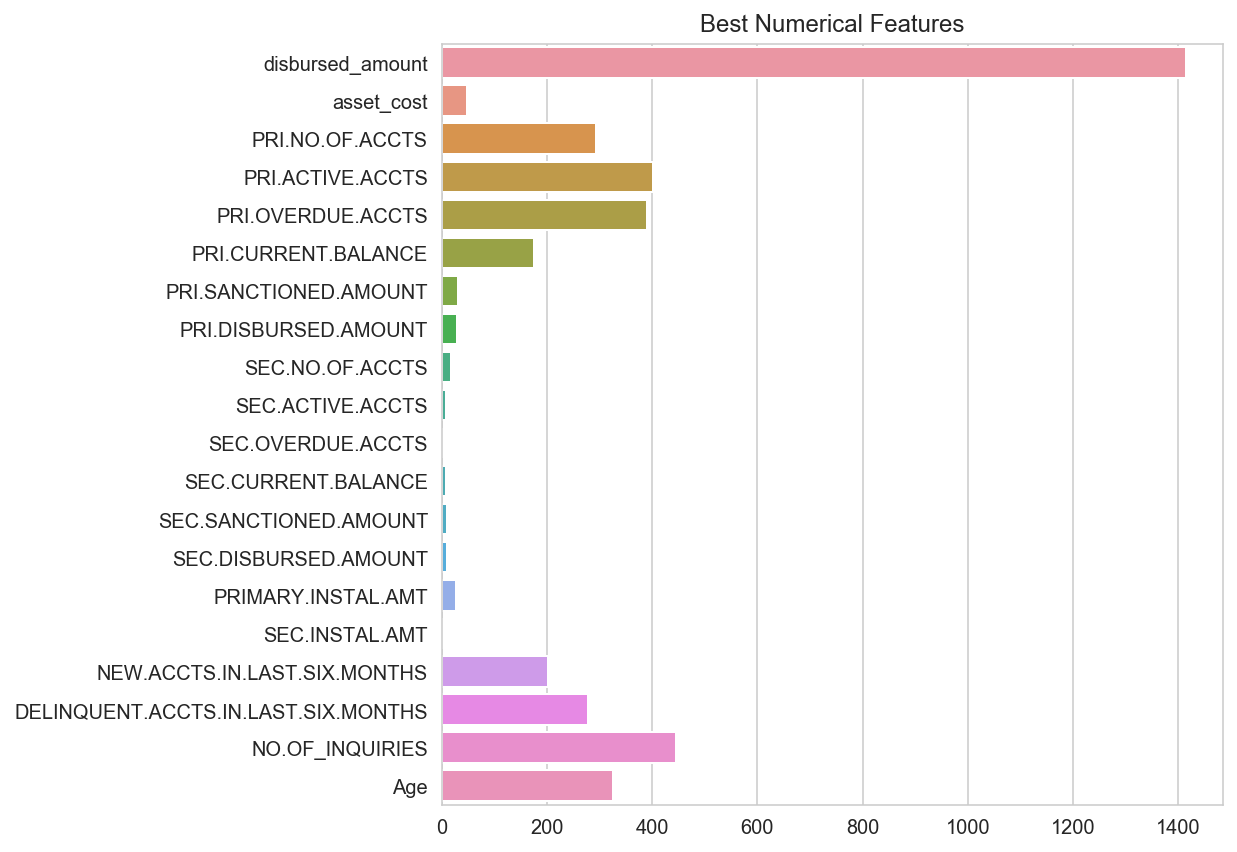

In [27]:
# let us use SelectKBest library to narrow down choices of features. This will make use of Annova test.
# the figure shows which factors might drive loan default
from sklearn.feature_selection import SelectKBest,f_classif
n = SelectKBest(score_func=f_classif, k=10)
numcols=n.fit(data[numerical],data['loan_default'])
plt.figure(figsize=(7,7))
sns.barplot(x=numcols.scores_,y=numerical)
plt.title('Best Numerical Features')
plt.show()

The secondary account details seem to have insignificant effect. We cannot afford to drop them because of convention. Let us combine them with Primary account features instead. This will work in our favour and decreases the number of features. 

In [28]:
data.loc[:,'No of Accounts'] = data['PRI.NO.OF.ACCTS'] + data['SEC.NO.OF.ACCTS']
data.loc[:,'PRI Inactive accounts'] = data['PRI.NO.OF.ACCTS'] - data['PRI.ACTIVE.ACCTS']
data.loc[:,'SEC Inactive accounts'] = data['SEC.NO.OF.ACCTS'] - data['SEC.ACTIVE.ACCTS']
data.loc[:,'Total Inactive accounts'] = data['PRI Inactive accounts'] + data['SEC Inactive accounts']
data.loc[:,'Total Overdue Accounts'] = data['PRI.OVERDUE.ACCTS'] + data['SEC.OVERDUE.ACCTS']
data.loc[:,'Total Current Balance'] = data['PRI.CURRENT.BALANCE'] + data['SEC.CURRENT.BALANCE']
data.loc[:,'Total Sanctioned Amount'] = data['PRI.SANCTIONED.AMOUNT'] + data['SEC.SANCTIONED.AMOUNT']
data.loc[:,'Total Disbursed Amount'] = data['PRI.DISBURSED.AMOUNT'] + data['SEC.DISBURSED.AMOUNT']
data.loc[:,'Total Installment'] = data['PRIMARY.INSTAL.AMT'] + data['SEC.INSTAL.AMT']

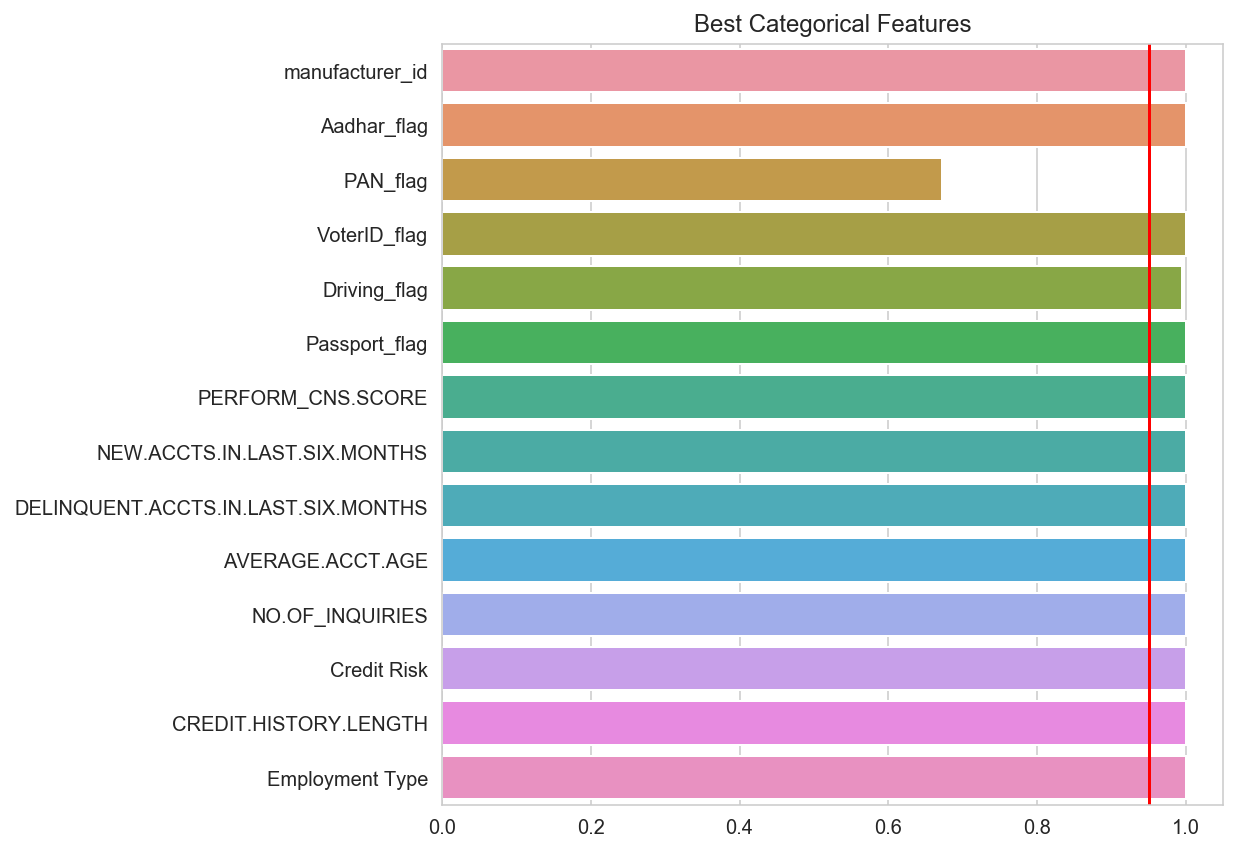

In [29]:
# Let us conduct a similar test for categorical variables - Chi Square test
from scipy.stats import chi2_contingency
l=[]
for i in categorical:
    pvalue  = chi2_contingency(pd.crosstab(data['loan_default'],data[i]))[1]
    l.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=l, y=categorical)
plt.title('Best Categorical Features')
plt.axvline(x=(1-0.05),color='r')
plt.show()

Like the previous graph, this one too shows 'Acceptance of Alternate Hypothesis'. Here every feature seems significant except for PAN_flag. PAN Card is mandatory to obtain credit score. Hence we can observe some correlation(multicolleniarity) between credit score and PAN Card Because of which the Chi Square test deemed it surplus to our model. 

In [30]:
def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [31]:
data['AVERAGE.ACCT.AGE'] = data['AVERAGE.ACCT.AGE'].apply(duration)
data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].apply(duration)

In [32]:
data=data.drop(['PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS','PRI.CURRENT.BALANCE','PRI Inactive accounts','SEC Inactive accounts',
            'PRI.SANCTIONED.AMOUNT','SEC.NO.OF.ACCTS','PRI.NO.OF.ACCTS','PRI.DISBURSED.AMOUNT','PRI.ACTIVE.ACCTS', 
            'PRI.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT', 'SEC.OVERDUE.ACCTS',
            'SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT','disbursed_amount','SEC.ACTIVE.ACCTS'],axis=1)

In [33]:
nums=['asset_cost', 'ltv','PERFORM_CNS.SCORE',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES','No of Accounts', 'Total Inactive accounts',
       'Total Overdue Accounts', 'Total Current Balance', 'Total Sanctioned Amount',
       'Total Disbursed Amount', 'Total Installment','Age']

In [34]:
len(nums)

16

Basic Model Building 

In [35]:
y=data.loan_default
X=data.drop("loan_default",axis=1)
from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('train accuracy :',lr.score(X_train,y_train))
print('test accuracy :',lr.score(X_test,y_test))
print("precision :",precision_score(y_test,y_pred),"\n")
print("recall :",recall_score(y_test,y_pred),"\n")
print("f1 score:",f1_score(y_test,y_pred),"\n")
print(classification_report(y_test,y_pred))

train accuracy : 0.7829627405687256
test accuracy : 0.7827926858907458
precision : 0.0 

recall : 0.0 

f1 score: 0.0 

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54756
           1       0.00      0.00      0.00     15191

    accuracy                           0.78     69947
   macro avg       0.39      0.50      0.44     69947
weighted avg       0.61      0.78      0.69     69947



Even though statistically this model has an accuracy of 78%, it useless from the business perspective. We see that the Recall score of the model is 0. Which means that the model completely fails to predict the defaulters. To get better results we have to deal with the Class Imbalance. 

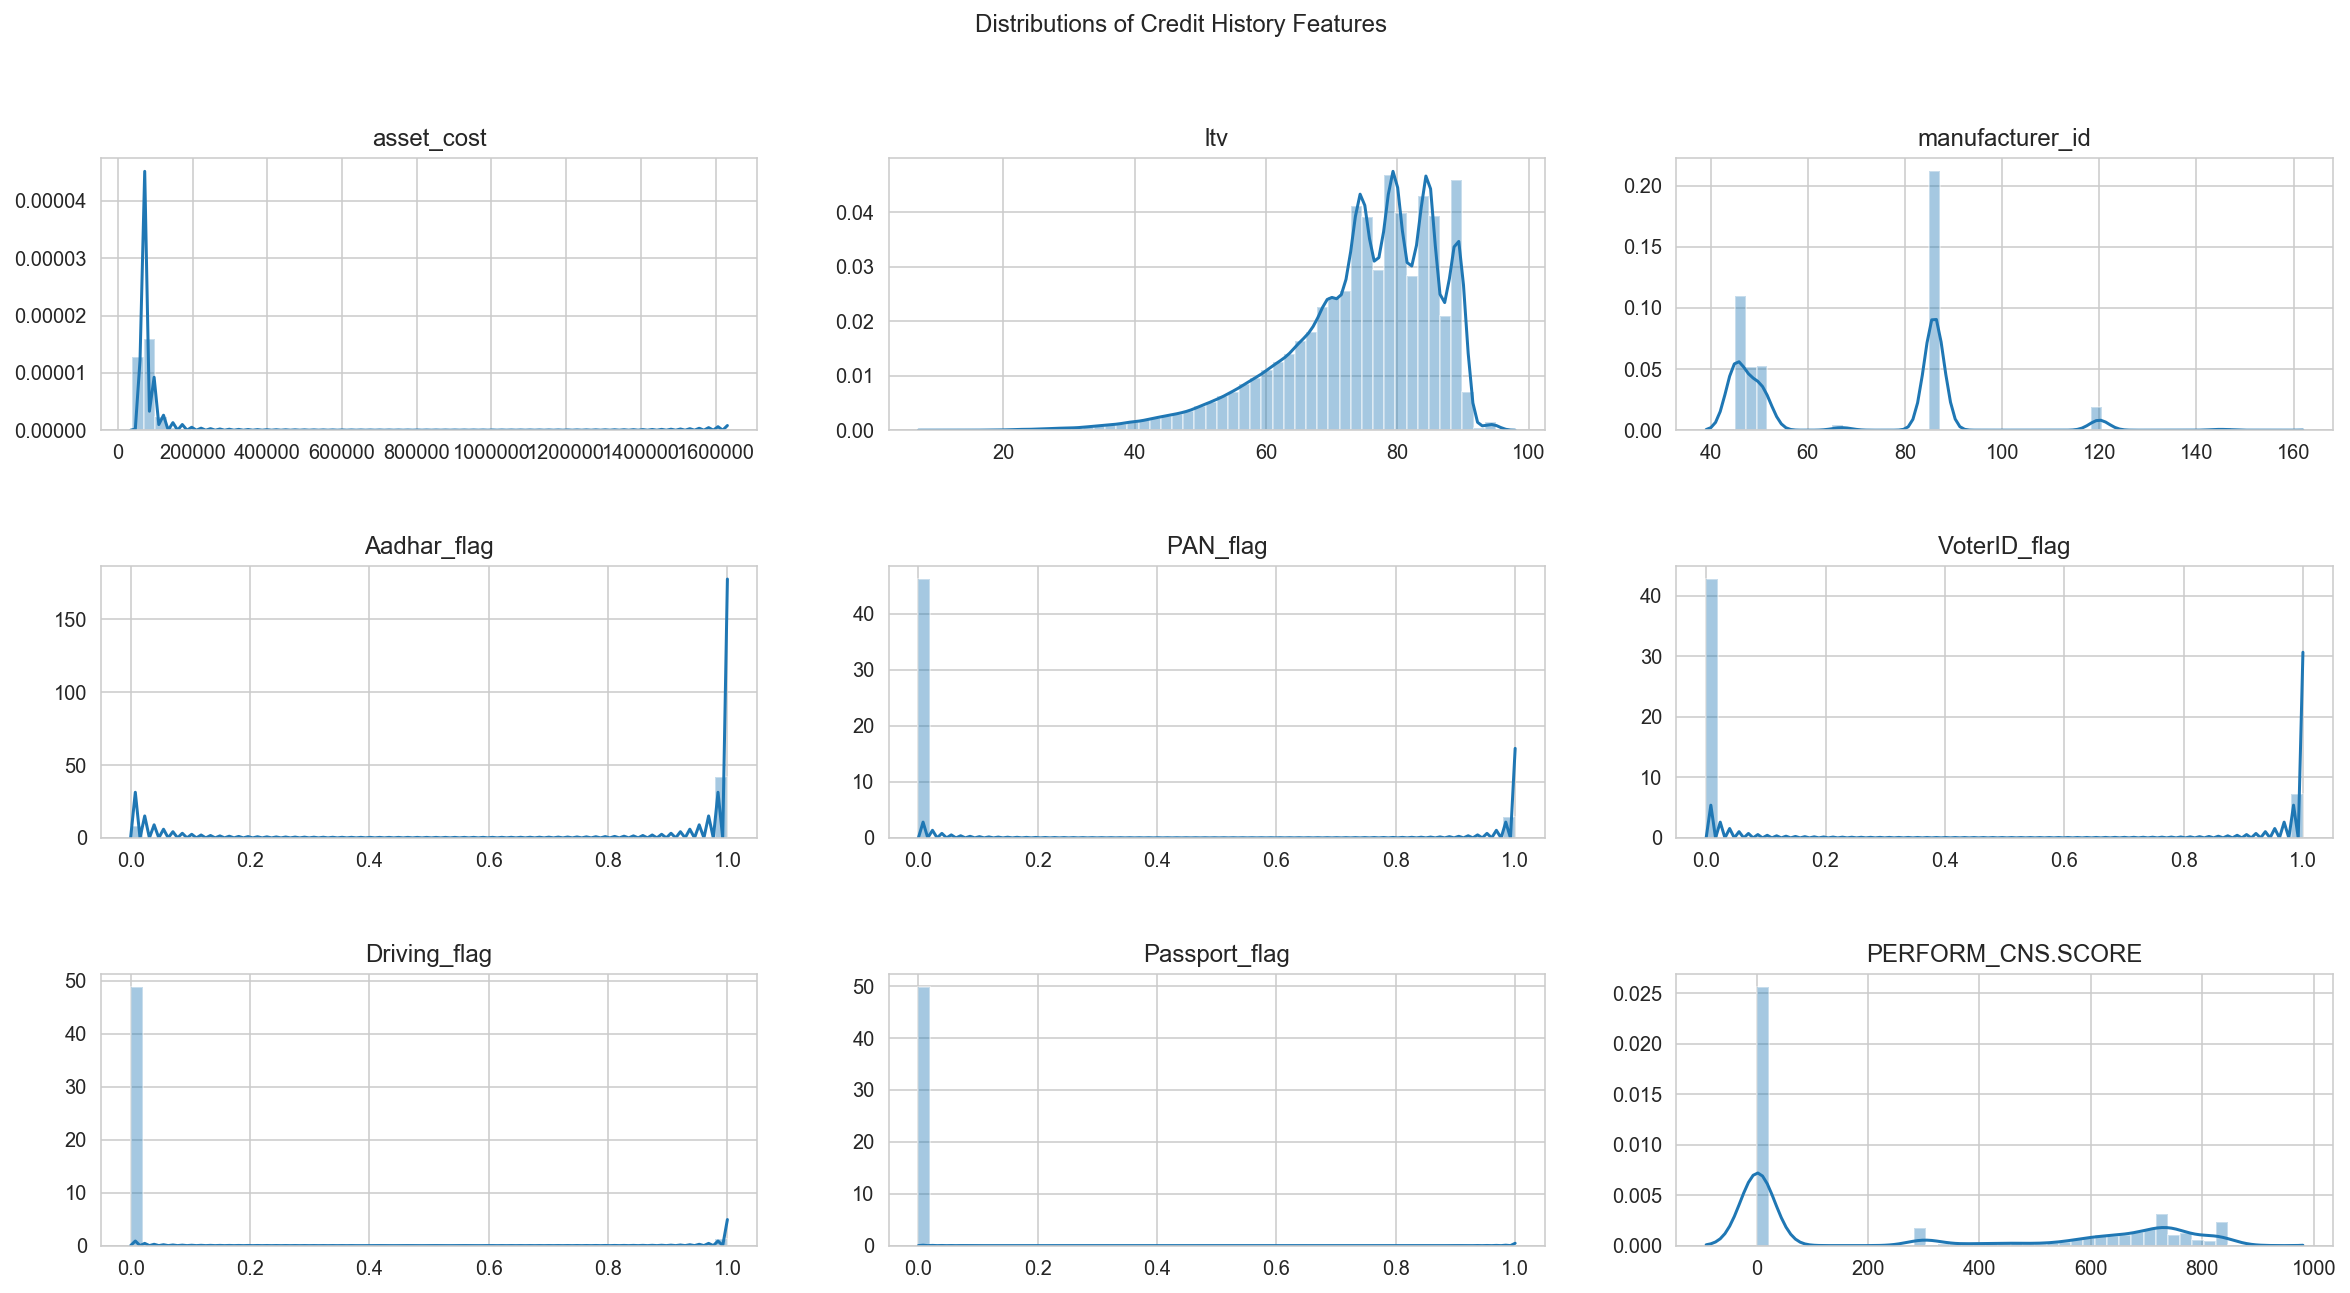

In [36]:
#Let us have a look at how the Credit History features are distributed for the given data. 
n=['PERFORM_CNS.SCORE','NO.OF_INQUIRIES','No of Accounts', 'Total Inactive accounts',
       'Total Overdue Accounts', 'Total Current Balance', 'Total Sanctioned Amount',
       'Total Disbursed Amount', 'Total Installment']
df=data[n]
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Credit History Features')

for ax, feature, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.distplot(feature, ax=ax)
    ax.set(title=str(name))
plt.show()

There are a large number of '0's in the above data. That is because majority of the people are availing loans for the first time. Which is a common for real world loan applicants. We also see that there are some outliers which will complicate the process further. 
Instead of trying to remove the outliers, let us try to bring them closer to the median values. 

In [37]:
from sklearn.preprocessing import  RobustScaler
rob_scaler = RobustScaler()

data[nums] = rob_scaler.fit_transform(data[nums])

Now, for the zero observations, we'll make a new feature that counts the features having zero. This will act as yardstick between people who have a credit history and those who dont. Of course, people with no credit history will likely have more than 9 features as zero, unlikely in case of customers with credit history.

In [38]:
data['Missing Features'] = (data == 0).astype(int).sum(axis=1)

Now let's try on our base model. We'll use XGBoost to reduce bias and variance errors, and do some hyperparameter tuning.

In [39]:
y=data.loan_default
X=data.drop("loan_default",axis=1)
from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
from xgboost import XGBClassifier
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([26.53115153, 25.76911235, 24.43756557, 38.8371942 , 41.49758895,
         38.4023095 , 59.44716152, 57.25621343, 53.12037921, 81.37515918,
         77.81094122, 57.97693427]),
  'std_fit_time': array([0.19861636, 0.47774798, 0.94611147, 0.08915008, 0.95607736,
         2.53923511, 1.06096393, 0.78355367, 0.19058537, 1.33429601,
         1.85014593, 9.55126125]),
  'mean_score_time': array([0.34995715, 0.32233198, 0.3443172 , 0.42786098, 0.46242531,
         0.4436957 , 0.60609341, 0.55741254, 0.5626053 , 0.73503121,
         0.69832993, 0.62362941]),
  'std_score_time': array([0.03075384, 0.01816935, 0.02213784, 0.03173151, 0.05038499,
         0.03971828, 0.01815622, 0.02342998, 0.0345603 , 0.05692072,
         0.01551937, 0.06058465]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

In [42]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [43]:
param_test2b = {
 'max_depth':range(7,10,2)
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
gsearch2b.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_...ad=4,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=1,
     

In [44]:
gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_

({'mean_fit_time': array([55.23095767, 52.93569223]),
  'std_fit_time': array([ 0.42409619, 13.60557586]),
  'mean_score_time': array([0.62020659, 0.61971378]),
  'std_score_time': array([0.06060447, 0.03900353]),
  'param_max_depth': masked_array(data=[7, 9],
               mask=[False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 7}, {'max_depth': 9}],
  'split0_test_score': array([0.99790289, 0.99903401]),
  'split1_test_score': array([0.99753306, 0.99873011]),
  'split2_test_score': array([0.99752373, 0.99877133]),
  'mean_test_score': array([0.99765323, 0.99884515]),
  'std_test_score': array([0.00017658, 0.0001346 ]),
  'rank_test_score': array([2, 1])},
 {'max_depth': 9},
 0.9988451510982129)

In [45]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.2}, 0.9991531429460663)

In [46]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=9,
 min_child_weight=1,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [47]:
xgb4.fit(X_train,y_train)
y_pred=xgb4.predict(X_test)
print("accuracy train:",xgb4.score(X_train,y_train),"\n")
print("accuracy test:",xgb4.score(X_test,y_test),"\n")
print("precision :",precision_score(y_test,y_pred),"\n")
print("Recall :",recall_score(y_test,y_pred),"\n")
print("f1 score:",f1_score(y_test,y_pred),"\n")
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))

accuracy train: 0.9999448553064513 

accuracy test: 0.998413084192317 

precision : 0.9986112948022748 

Recall : 0.9940754394049108 

f1 score: 0.9963382047306436 

Confusion Matrix 
 [[54735    21]
 [   90 15101]]


This gives us excellent results compared to the earlier model where it failed to predict defaults in any way. 

In [48]:
import sklearn.metrics as metrics

In [49]:
probs = xgb4.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [50]:
print(fpr, tpr)

[0.         0.         0.         ... 0.9982285  0.99826503 1.        ] [0.00000000e+00 6.58284511e-05 5.26627608e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


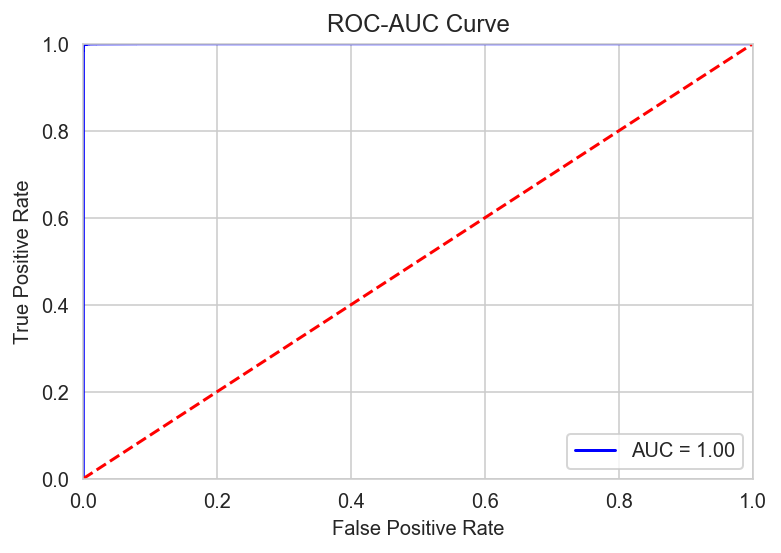

In [51]:
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC Curve')
plt.show()

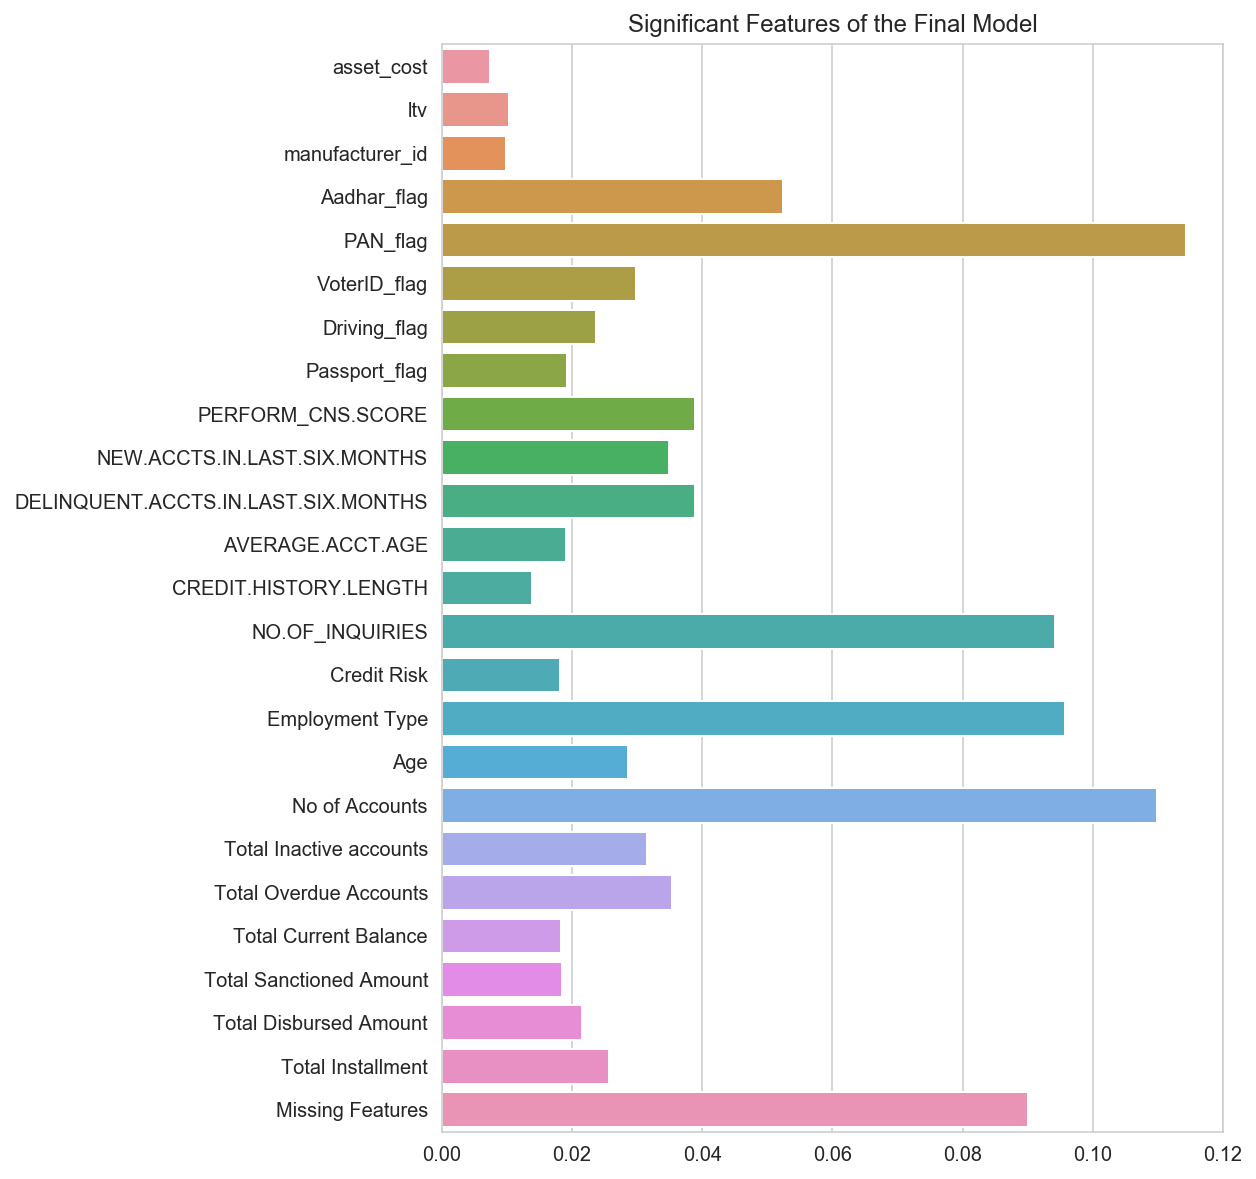

In [52]:
plt.figure(figsize=(7,10))
sns.barplot(x=xgb4.feature_importances_,y=X.columns)
plt.title('Significant Features of the Final Model')
plt.show()